In [25]:
import pandas as pd

# Read in csv
data = pd.read_csv("preprocessing_tweet_price_final.csv")
data


,id,user,fullname,url,timestamp,replies,likes,retweets,text,hash tag,emoji,sentiment,price change
0,1.149508e+18,logancrypto_com,Logan Crypto,NaN,2019-07-12,0.0,0.0,0.0,APompliano RT APompliano Lol guess finally Bit...,NaN,"😂,🙈",positive,457.324219
1,1.146511e+18,cyertho,Cyertho Comunicación,NaN,2019-07-03,0.0,2.0,2.0,La ‘ revolución ’ del,NaN,NaN,neutral,1159.591797
2,9.390872e+17,guguruko,ぐぐる子,/guguruko/status/939087171763429376,2017-12-08,0.0,0.0,0.0,bitcoin priceってゆうか、,NaN,NaN,neutral,-1330.298828
3,9.391174e+17,guguruko,ぐぐる子,/guguruko/status/939117367992315905,2017-12-08,0.0,0.0,0.0,Tiffany Haddishちゃんが,NaN,NaN,neutral,-1330.298828
4,1.174523e+18,BTCstJournal,The Bitcoin Street Journal,NaN,2019-09-19,0.0,0.0,0.0,BTC/USD – WHY WE ARE IN A BULLRUN AND WONT DUM...,NaN,NaN,neutral,68.166992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5696013,1.241086e+18,ksmith_04,kale smith🎈,NaN,2020-03-20,0.0,0.0,0.0,kalesmith0,NaN,NaN,neutral,120.740258
5696014,1.241086e+18,supermo500,Mohamed,NaN,2020-03-20,0.0,0.0,0.0,"We ’ giving away 100,000 RT cashtag £cashtag c...",#CashAppFriday,NaN,neutral,120.740258
5696015,1.241086e+18,chaoticbeauty03,Elleybear,NaN,2020-03-20,0.0,0.0,0.0,Lost job due pandemic really need help rn 🤞 be...,NaN,"🙏,🏽,🤞,🏽",positive,120.740258
5696016,1.241086e+18,TTonyNA,I’m Tired,NaN,2020-03-20,0.0,0.0,0.0,LegitTony,NaN,NaN,neutral,120.740258


In [30]:
# Extract relevant columns
data2 = pd.DataFrame()
data2 = data.loc[:,['timestamp', 'replies', 'likes', 'retweets', 'sentiment', 'price change']]

# Change data type to int
data2.loc[:,'replies'] = data2['replies'].astype('int32')
data2.loc[:,'likes'] = data2['likes'].astype('int32')
data2.loc[:,'retweets'] = data2['retweets'].astype('int32')

# Remap qualitative sentiment values to quantitative values
data2.loc[:,'sentiment'] = data2['sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
data2.loc[:,'sentiment'] = data2['sentiment'].astype('int32')

data2

,timestamp,replies,likes,retweets,sentiment,price change
0,2019-07-12,0,0,0,1,457.324219
1,2019-07-03,0,2,2,0,1159.591797
2,2017-12-08,0,0,0,0,-1330.298828
3,2017-12-08,0,0,0,0,-1330.298828
4,2019-09-19,0,0,0,0,68.166992
...,...,...,...,...,...,...
5696013,2020-03-20,0,0,0,0,120.740258
5696014,2020-03-20,0,0,0,0,120.740258
5696015,2020-03-20,0,0,0,1,120.740258
5696016,2020-03-20,0,0,0,0,120.740258


In [31]:
# Target value is the price change
Y = data2['price change']

# Predictor values are replies, likes, retweets, and sentiment
X = data2.drop(columns=['timestamp', 'price change'])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

Root mean squared error = 473.1300
R-square = 0.0002
Slope Coefficients: [-5.71638206e-02  5.78028547e-03 -1.03570657e-03  1.41478477e+01]
Intercept: 5.7299086323912585


Text(0, 0.5, 'Predicted values for y(Price Change)')

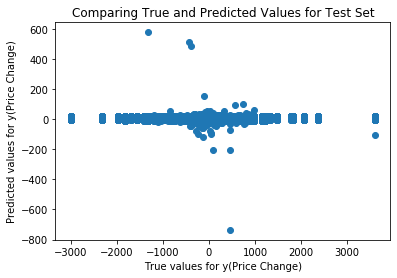

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R-square = %.4f" % r2_score(y_test, y_pred_test))
print('Slope Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

plt.scatter(y_test,y_pred_test)
plt.title("Comparing True and Predicted Values for Test Set")
plt.xlabel("True values for y(Price Change)")
plt.ylabel("Predicted values for y(Price Change)")